# Model Exercises

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import Holt

import math

from prepare import wrangle_sales

In [2]:
plt.rc('figure', figsize=(16, 9))
plt.rc('font', size=16)

## Use the sales data for these exercises:

In [3]:
sales = wrangle_sales()
sales

,item,sale_amount,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total,sales_diff
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,1,10.92,0.00
2013-01-02 00:00:00+00:00,1,11.0,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,2,9.24,-1.68
2013-01-03 00:00:00+00:00,1,14.0,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,3,11.76,2.52
2013-01-04 00:00:00+00:00,1,13.0,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,4,10.92,-0.84
2013-01-05 00:00:00+00:00,1,10.0,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,5,8.40,-2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00+00:00,50,63.0,912996,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,12,2,327.60,114.40
2017-12-28 00:00:00+00:00,50,59.0,912997,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,12,3,306.80,-20.80
2017-12-29 00:00:00+00:00,50,74.0,912998,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,12,4,384.80,78.00


### Split data (train/test) and resample by any period, except daily, and aggregate using the sum.

In [4]:
sales = sales.resample('W').sum()
sales

,item,sale_amount,sale_id,store,item_price,item_upc12,item_upc14,store_zipcode,month,day_of_week,sales_total,sales_diff
sale_date,,,,,,,,,,,,
2013-01-06 00:00:00+00:00,76500,91067.0,1366771500,16500,15481.2,715406353473120,715406353473120,234674400,3000,10500,490767.50,-47396.41
2013-01-13 00:00:00+00:00,89250,103902.0,1594589500,19250,18061.4,834640745718640,834640745718640,273786800,3500,10500,559934.21,2116.26
2013-01-20 00:00:00+00:00,89250,102950.0,1594614000,19250,18061.4,834640745718640,834640745718640,273786800,3500,10500,552813.52,-379.24
2013-01-27 00:00:00+00:00,89250,103298.0,1594638500,19250,18061.4,834640745718640,834640745718640,273786800,3500,10500,554908.84,-204.58
2013-02-03 00:00:00+00:00,89250,109027.0,1594663000,19250,18061.4,834640745718640,834640745718640,273786800,5000,10500,586547.55,9966.81
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-03 00:00:00+00:00,89250,187286.0,1600837000,19250,18061.4,834640745718640,834640745718640,273786800,40000,10500,1006145.15,-56683.95
2017-12-10 00:00:00+00:00,89250,154400.0,1600861500,19250,18061.4,834640745718640,834640745718640,273786800,42000,10500,830597.14,152.50
2017-12-17 00:00:00+00:00,89250,155296.0,1600886000,19250,18061.4,834640745718640,834640745718640,273786800,42000,10500,834271.29,-2169.47


/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


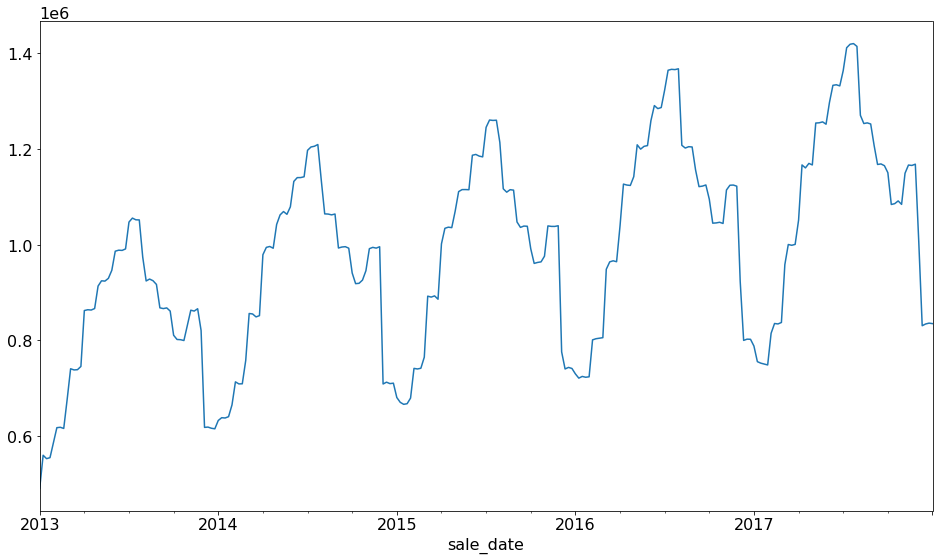

In [5]:
sales.sales_total.plot()

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


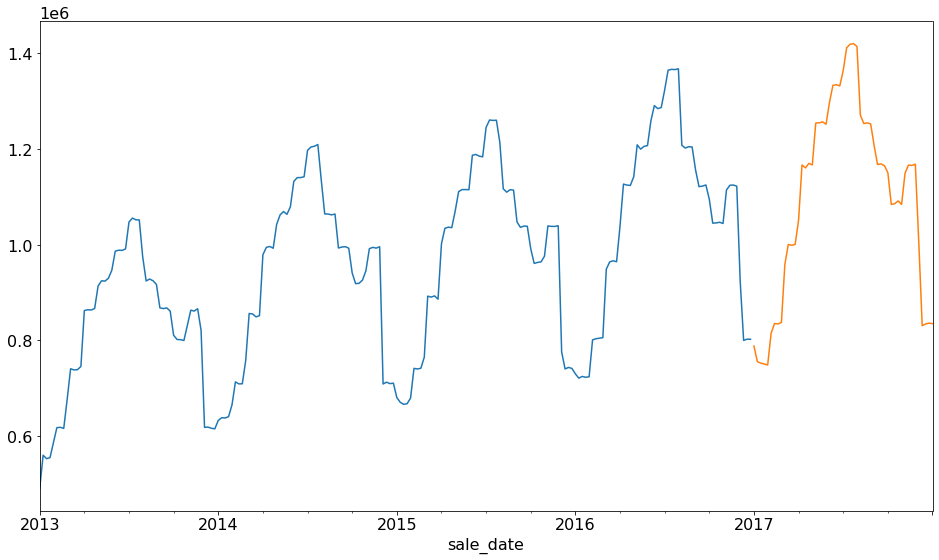

In [6]:
train = sales[:'2016']
test = sales['2017':]

train.sales_total.plot()
test.sales_total.plot()

### Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:

#### Simple Average

In [7]:
simple_average = round(train.sales_total.mean(), 2)

preds = pd.DataFrame({'simple_average': simple_average}, index = test.index)

In [8]:
sa_mse = mean_squared_error(test.sales_total, preds.simple_average)
sa_rmse = round(math.sqrt(sa_mse),0)

Text(0.5, 1.0, 'Simple Average Model RMSE: 250161.00 MSE: 62580714505.64')

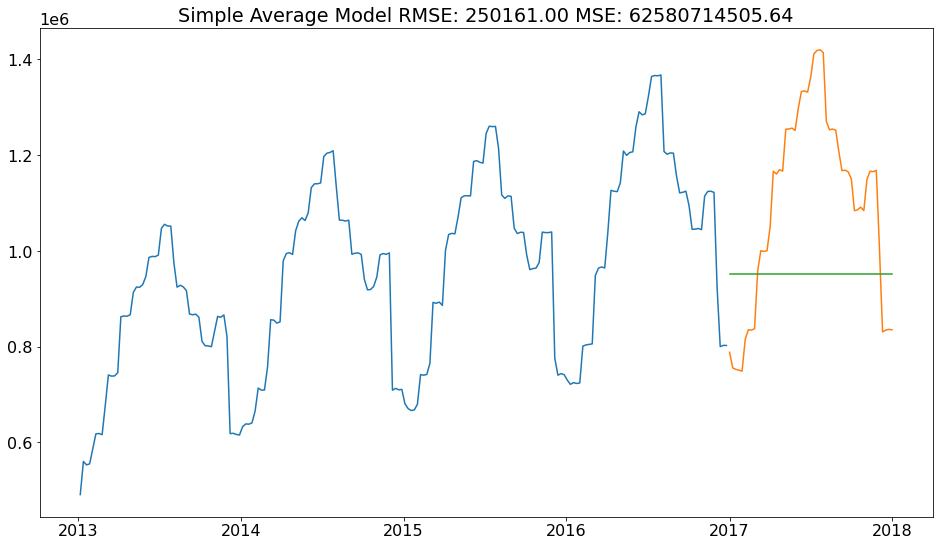

In [9]:
plt.plot(train.sales_total)
plt.plot(test.sales_total)
plt.plot(preds.simple_average)
plt.title(f'Simple Average Model RMSE: {sa_rmse:.2f} MSE: {sa_mse:.2f}')

#### Moving Average

In [10]:
moving_average = round(train.sales_total.rolling(4).mean().iloc[-1], 2)
preds['moving_average'] = moving_average

In [11]:
ma_mse = mean_squared_error(test.sales_total, preds.moving_average)
ma_rmse = round(math.sqrt(ma_mse),0)

Text(0.5, 1.0, 'Simple Average and Moving Average Model')

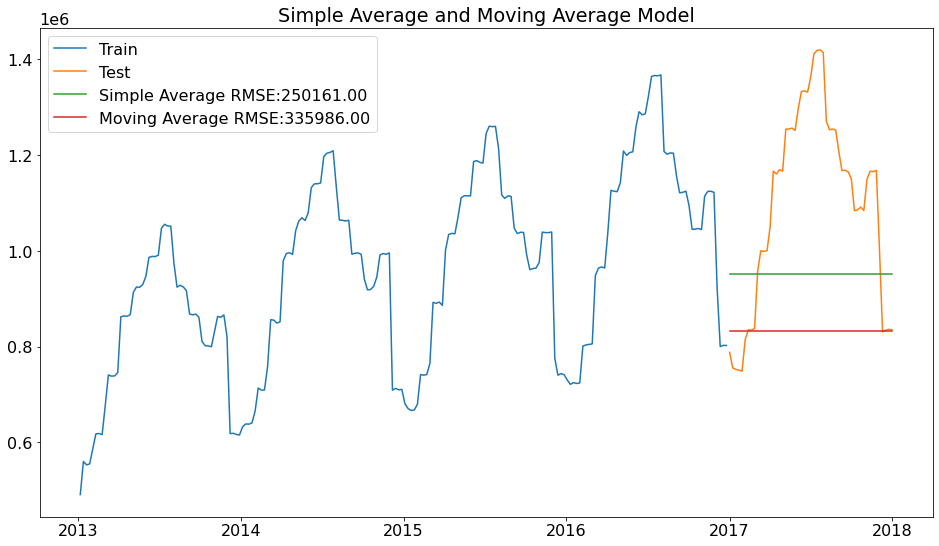

In [12]:
plt.plot(train.sales_total, label='Train')
plt.plot(test.sales_total, label='Test')
plt.plot(preds.simple_average, label=f'Simple Average RMSE:{sa_rmse:.2f}')
plt.plot(preds.moving_average, label=f'Moving Average RMSE:{ma_rmse:.2f}')
plt.legend()
plt.title(f'Simple Average and Moving Average Model')

#### Holt's Linear Trend Model

In [57]:
holt_lin = Holt(train.sales_total, exponential=False)
holt_lin = holt_lin.fit(smoothing_level=.05, smoothing_slope=.05, optimized=False)
preds['holt_linear'] = holt_lin.predict(start = test.index[0], end = test.index[-1])

In [58]:
hl_mse = mean_squared_error(test.sales_total, preds.holt_linear)
hl_rmse = round(math.sqrt(hl_mse),0)

Text(0.5, 1.0, 'Multiple predictions models')

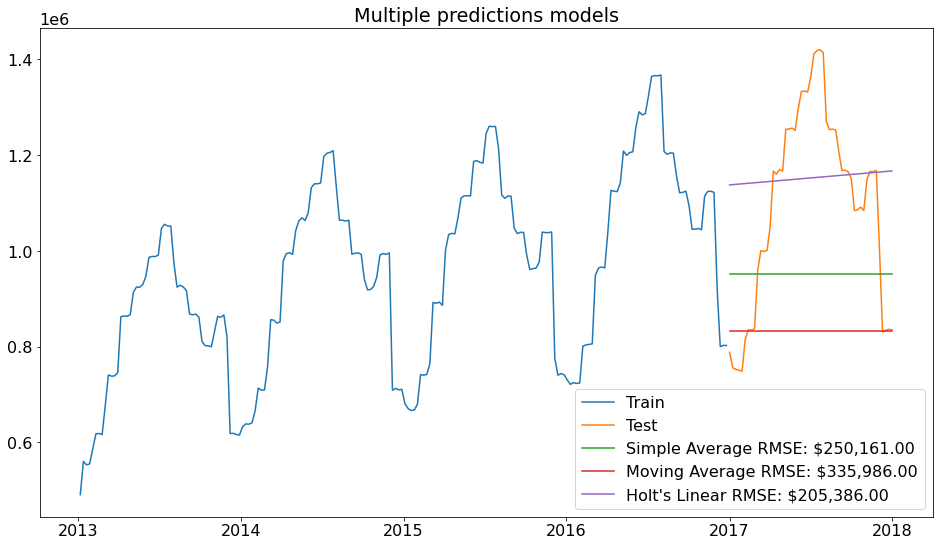

In [59]:
plt.plot(train.sales_total, label='Train')
plt.plot(test.sales_total, label='Test')
plt.plot(preds.simple_average, label=f'Simple Average RMSE: ${sa_rmse:,.2f}')
plt.plot(preds.moving_average, label=f'Moving Average RMSE: ${ma_rmse:,.2f}')
plt.plot(preds.holt_linear, label=f"Holt's Linear RMSE: ${hl_rmse:,.2f}")
plt.legend()
plt.title(f'Multiple predictions models')